In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df=pd.read_csv("spam_ham_dataset.csv")

In [116]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [117]:
df.shape

(5171, 4)

### 1.) Data Cleaning

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [119]:
# reanaming the column
df.rename(columns={'label':'Target'},inplace=True)

In [120]:
df.sample()

,Unnamed: 0,Target,text,label_num
4135,1995,ham,Subject: re : occidental battleground meter 98...,0


In [121]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Target,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [122]:
df.drop(columns=['Target'],inplace=True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [123]:
#missing value
df.isnull().sum()


text         0
label_num    0
dtype: int64

In [124]:
# check for duplicate value
df.duplicated().sum()

178

In [125]:
#remove duplicated value
df= df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [126]:
df.shape

(4993, 2)

### 2.) EDA

In [127]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [128]:
df['label_num'].value_counts()

0    3531
1    1462
Name: label_num, dtype: int64

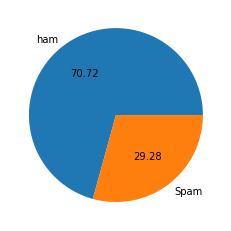

In [129]:
plt.pie(df['label_num'].value_counts(), labels=['ham','Spam'],autopct="%0.2f")
plt.show()

#data is imbalnced

In [130]:
import nltk

In [131]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [132]:
df['num_characters']=df['text'].apply(len)

In [133]:
df.head()

,text,label_num,num_characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [134]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [135]:
df.head()

,text,label_num,num_characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [136]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [137]:
df.head()

,text,label_num,num_characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [138]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [139]:
#Spam
df[df['label_num'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [140]:
#Ham
df[df['label_num'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


<AxesSubplot:xlabel='num_words', ylabel='Count'>

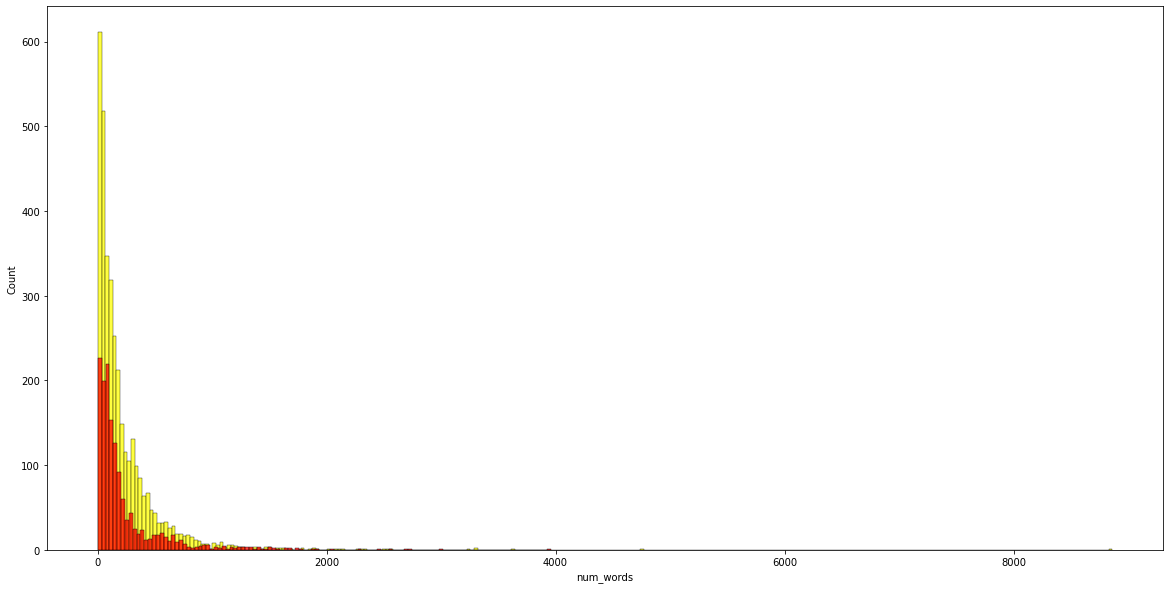

In [141]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['label_num'] == 0]['num_words'],color='yellow')
sns.histplot(df[df['label_num'] == 1]['num_words'],color='red')

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

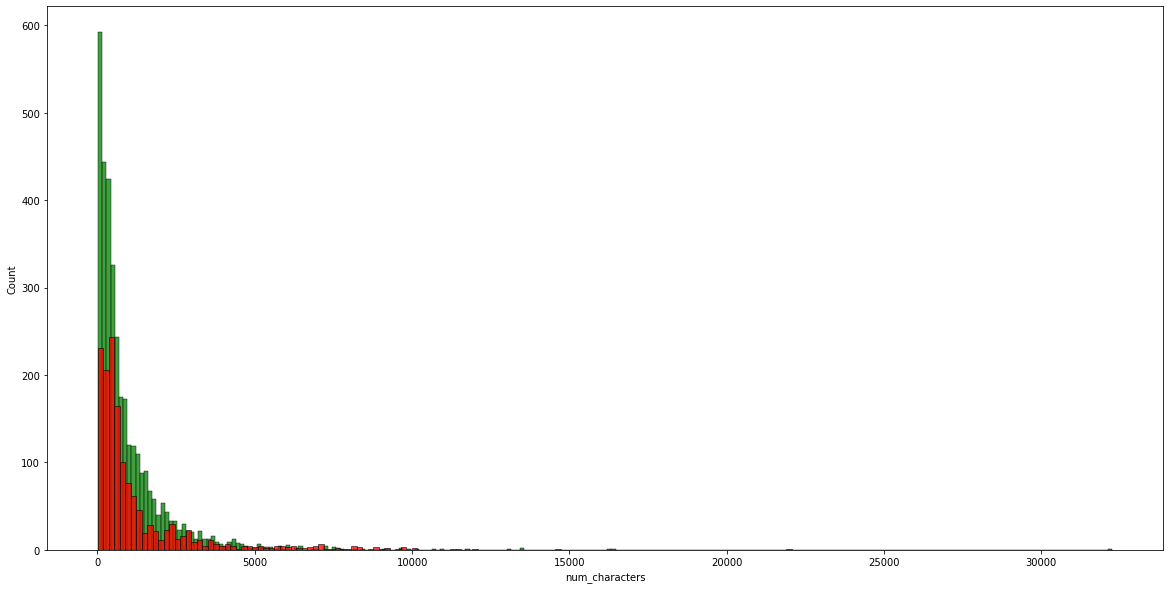

In [142]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['label_num'] == 0]['num_characters'],color='green')
sns.histplot(df[df['label_num'] == 1]['num_characters'],color='red')

<Figure size 1440x720 with 0 Axes>

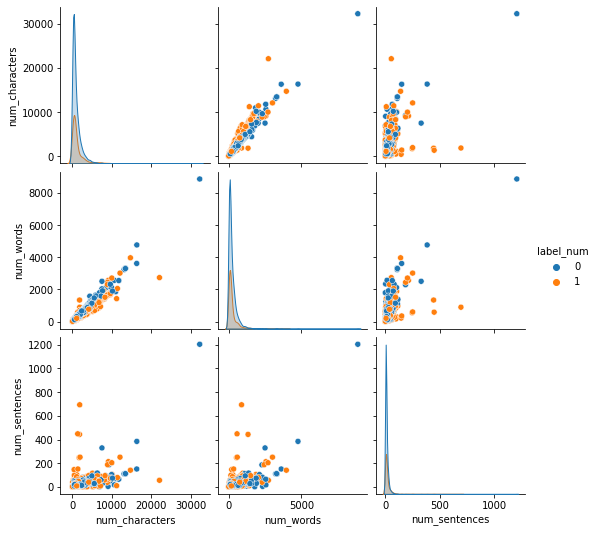

In [143]:
plt.figure(figsize=(20,10))
sns.pairplot(df,hue='label_num')

<AxesSubplot:>

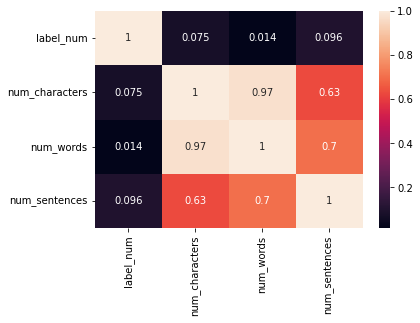

In [144]:
sns.heatmap(df.corr(),annot=True)

### 3. Data Preprocessing

    Lower case
    Tokenization
    Remove Special Characters
    Remove Stop words and punctuation
    Stemming

In [170]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_te(text):
    text = text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

            
    return" ".join(y)

In [176]:
transform_te("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .")

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [173]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [178]:
df['Transformed Text']=df['text'].apply(transform_te)

In [179]:
df.head(6)

,text,label_num,num_characters,num_words,num_sentences,Transformed Text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...
5,Subject: ehronline web address change\r\nthis ...,0,480,99,7,subject ehronlin web address chang messag inte...


In [196]:
from wordcloud import WordCloud
wc = WordCloud(width=3000,height=3000,min_font_size=10,background_color='white')

In [197]:
spam_wc=wc.generate(df[df['label_num'] == 1]['Transformed Text'].str.cat(sep=' '))

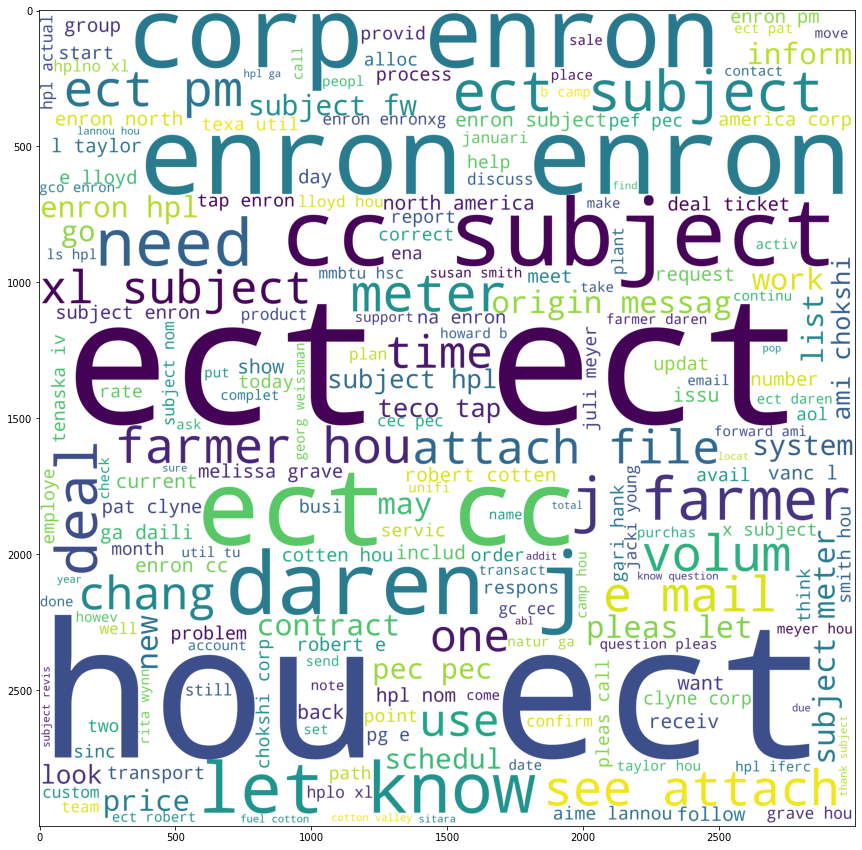

In [200]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

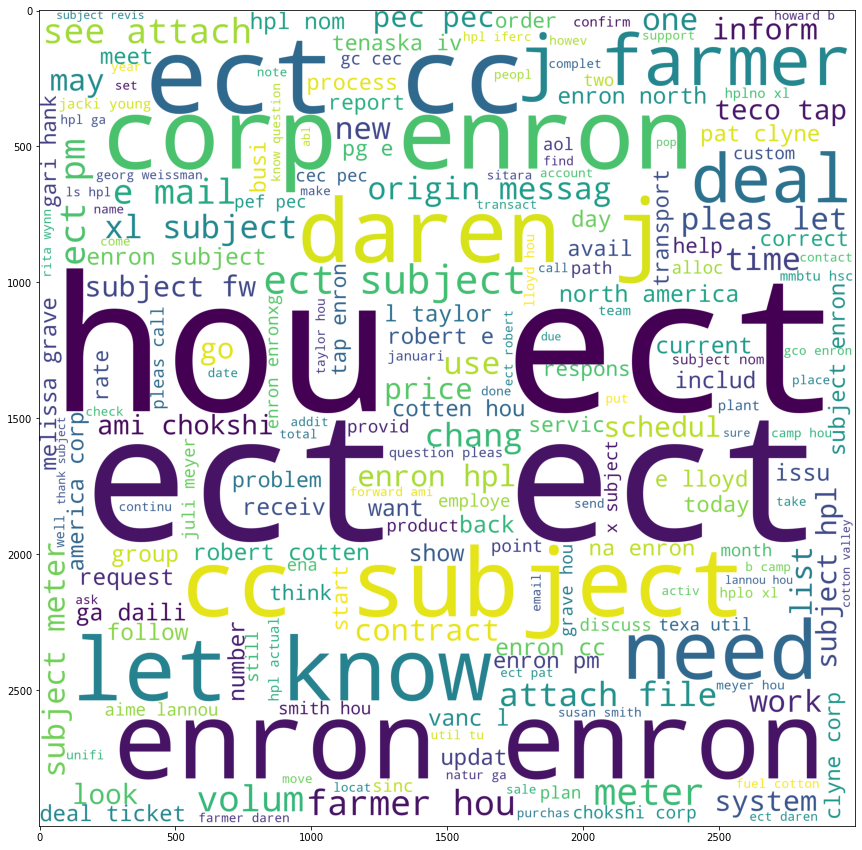

In [202]:
ham_wc=wc.generate(df[df['label_num'] == 0]['Transformed Text'].str.cat(sep=' '))
plt.figure(figsize=(15,15))
plt.imshow(ham_wc)

In [203]:
df.head()

,text,label_num,num_characters,num_words,num_sentences,Transformed Text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [209]:
spam_corpus=[]
for msg in df[df['label_num']==1]['Transformed Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [211]:
len(spam_corpus)

196592

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


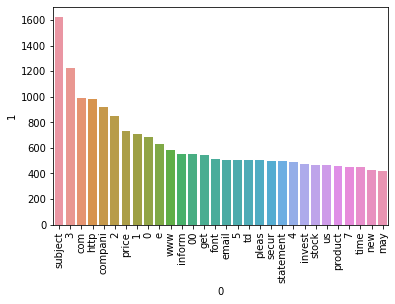

In [229]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [230]:
ham_corpus=[]
for msg in df[df['label_num']==0]['Transformed Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [231]:
len(ham_corpus)

380475

c:\Users\DINESHASHUTOSH\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


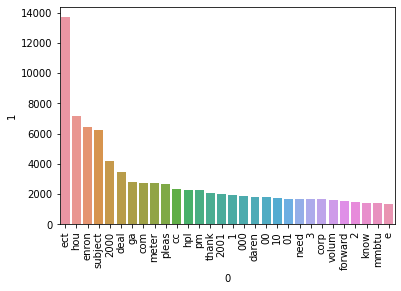

In [232]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4.) Model Building

In [251]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer()

In [254]:
X= Tfidf.fit_transform(df['Transformed Text']).toarray()

In [255]:
X.shape

(4993, 42592)

In [256]:
y=df['label_num'].values 

In [257]:
y


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [260]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [261]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [262]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9409409409409409
[[669  28]
 [ 31 271]]
0.9063545150501672


In [263]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.908908908908909
[[696   1]
 [ 90 212]]
0.9953051643192489


In [264]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8468468468468469
[[677  20]
 [133 169]]
0.8941798941798942


# tfidf  -->> MNB